In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("HousePrice.csv")

In [3]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,01-04-2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,01-04-2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,01-04-2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,01-04-2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,01-04-2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [4]:
df.shape

(63023, 13)

In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [6]:
df.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,63023.000000,4.843300e+04,63023.000000,63023.000000,63023.000000
mean,3.110595,9.978982e+05,3125.673897,7617.728131,12.684829
std,0.957551,5.934989e+05,125.626877,4424.423167,7.592015
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,3.000000,6.200000e+05,3056.000000,4380.000000,7.000000
50%,3.000000,8.300000e+05,3107.000000,6795.000000,11.400000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,64.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [8]:
df.corr()

,Rooms,Price,Postcode,Propertycount,Distance
Rooms,1.000000,0.412438,0.093666,-0.048985,0.268289
Price,0.412438,1.000000,0.003112,-0.060769,-0.253668
Postcode,0.093666,0.003112,1.000000,-0.002557,0.500263
Propertycount,-0.048985,-0.060769,-0.002557,1.000000,0.014050
Distance,0.268289,-0.253668,0.500263,0.014050,1.000000


In [9]:
mean=df['Price'].mean()        ## Finding mean value of PRICE column
mean

997898.2414882415

In [10]:
df['Price']=df['Price'].fillna(mean)        ##To make all values  of PRICE column fill with mean value

In [11]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

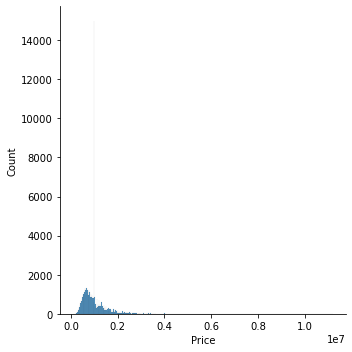

In [12]:
sns.displot(df['Price'])

In [13]:
    df['Price'].mean()

997898.2414880205

In [14]:
df['Price'].std()

520283.4883670009

In [15]:
Extream = df.Price.mean()+3*df.Price.std()
Extream

2558748.706589023

In [16]:
df['Price'].value_counts()

9.978982e+05    14590
6.000000e+05      459
1.100000e+06      432
1.000000e+06      396
8.000000e+05      396
                ...  
2.138000e+06        1
2.273000e+06        1
2.286000e+06        1
4.020000e+06        1
1.370500e+06        1
Name: Price, Length: 3418, dtype: int64

In [17]:
df['Price'].unique()

array([1490000., 1220000., 1420000., ..., 1274000.,  540800.,  347700.])

In [18]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [19]:
x=df.drop(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],axis=1)
y=df['Price']

In [20]:
#x=df.drop('Price',axis=1)
#y=df['Price']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [22]:
x_train.shape,x_test.shape

((50418, 1), (12605, 1))

In [23]:
y_train.shape,y_test.shape

((50418,), (12605,))

In [24]:
lasso_Reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)

In [25]:
lasso_Reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [26]:
lasso_Reg.score(x_train,y_train)

1.197878198633262e-06

In [27]:
lasso_Reg.score(x_test,y_test)

-0.00012257827000783372

In [28]:
y_predict=lasso_Reg.predict(x_test)
y_predict

array([998879.49658206, 998655.09942351, 999117.35757012, ...,
       999216.09231988, 999135.30934281, 999234.04409257])

In [29]:
print("R2_score: ",r2_score(y_predict,y_test))

R2_score:  -924011.6341921685


In [30]:
print("mean_squared_error: ",mean_squared_error(y_predict,y_test))

mean_squared_error:  262006601298.0839


In [31]:
print("RMSE: ", np.square(mean_squared_error(y_predict,y_test)))

RMSE:  6.8647459123773095e+22


In [32]:
ridge_Reg = Ridge(alpha=50,max_iter=100,tol=0.1)

In [33]:
ridge_Reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [34]:
ridge_Reg.score(x_train,y_train)

1.1978787639588262e-06